In [1]:
from datetime import timedelta
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
airports = [
    "KATL",
    "KCLT",
    "KDEN",
    "KDFW",
    "KJFK",
    "KMEM",
    "KMIA",
    "KORD",
    "KPHX",
    "KSEA",
]

In [3]:
airport = "KATL"

In [4]:
!pwd

/home/charmichokshi4444/Data


In [5]:
# !tar -xvf KSEA.tar

In [6]:
DATA_DIRECTORY = Path("./")


In [7]:
DATA_DIRECTORY

PosixPath('.')

In [25]:
airport = "KSEA"
pushback = pd.read_csv(DATA_DIRECTORY / f"train_labels_{airport}.csv.bz2")
pushback

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1006.SEA.DFW.210818.0059.0063.TFM,2021-08-18 23:45:00,KSEA,80
1,AAL1006.SEA.DFW.210818.0059.0063.TFM,2021-08-19 00:00:00,KSEA,65
2,AAL1006.SEA.DFW.210818.0059.0063.TFM,2021-08-19 00:15:00,KSEA,50
3,AAL1006.SEA.DFW.210818.0059.0063.TFM,2021-08-19 00:30:00,KSEA,35
4,AAL1006.SEA.DFW.210818.0059.0063.TFM,2021-08-19 00:45:00,KSEA,20
...,...,...,...,...
1647428,XSR718.SEA.ADS.220421.1759.0024.TFM,2022-04-21 19:45:00,KSEA,75
1647429,XSR718.SEA.ADS.220421.1759.0024.TFM,2022-04-21 20:00:00,KSEA,60
1647430,XSR718.SEA.ADS.220421.1759.0024.TFM,2022-04-21 20:15:00,KSEA,45
1647431,XSR718.SEA.ADS.220421.1759.0024.TFM,2022-04-21 20:30:00,KSEA,30


In [26]:
etd = pd.read_csv(
    DATA_DIRECTORY / airport / f"{airport}_etd.csv.bz2",
    parse_dates=["departure_runway_estimated_time", "timestamp"],
)
etd

,gufi,timestamp,departure_runway_estimated_time
0,QXE2364.SEA.PUW.211031.0555.0013.TFM,2021-11-01 07:00:01,2021-11-01 06:04:00
1,UAL2379.SEA.IAH.211101.0700.0022.TFM,2021-11-01 07:00:39,2021-11-02 07:09:00
2,UAL2497.SEA.ORD.211101.0655.0009.TFM,2021-11-01 07:00:41,2021-11-02 07:09:00
3,AAL1119.SEA.ORD.211101.0655.0010.TFM,2021-11-01 07:00:42,2021-11-02 07:11:00
4,ASA7095.SEA.ANC.211101.0655.0005.TFM,2021-11-01 07:00:43,2021-11-02 07:10:00
...,...,...,...
6028928,DAL869.SEA.ATL.211030.1910.0084.TFM,2021-10-31 22:59:25,2021-10-31 20:19:00
6028929,DAL1747.SEA.DTW.211030.1915.0062.TFM,2021-10-31 22:58:52,2021-10-31 19:28:00
6028930,ASA1482.SEA.ANC.211030.1950.0079.TFM,2021-10-31 22:59:36,2021-10-31 20:05:00
6028931,ASA1430.SEA.LAS.211030.2100.0182.TFM,2021-10-31 22:59:37,2021-10-31 21:19:00


In [27]:
submission_format = pd.read_csv(
    DATA_DIRECTORY / "submission_format.csv", parse_dates=["timestamp"]
)
submission_format

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,0
1,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:30:00,KATL,0
2,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:45:00,KATL,0
3,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:00:00,KATL,0
4,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:15:00,KATL,0
...,...,...,...,...
2042718,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 20:45:00,KSEA,0
2042719,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:00:00,KSEA,0
2042720,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:15:00,KSEA,0
2042721,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:30:00,KSEA,0


In [28]:
row = submission_format.iloc[200]
row

gufi                      AAL1008.ATL.DFW.211204.2135.0163.TFM
timestamp                                  2021-12-05 21:00:00
airport                                                   KATL
minutes_until_pushback                                       0
Name: 200, dtype: object

In [29]:
etd['timestamp'] = pd.to_datetime(etd['timestamp'])
row['timestamp'] = pd.to_datetime(row['timestamp'])

# etd['timestamp'] = pd.to_datetime(etd['timestamp'])

<ipython-input-29-80cd9d03c814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['timestamp'] = pd.to_datetime(row['timestamp'])


In [38]:
now_etd = etd.loc[
    (etd.timestamp > row.timestamp - timedelta(hours=30))
    & (etd.timestamp <= row.timestamp)
    & (etd.gufi == row.gufi)
]
now_etd

,gufi,timestamp,departure_runway_estimated_time


In [31]:
flight_pushback = now_etd.iloc[-1].departure_runway_estimated_time - timedelta(
    minutes=15
)
flight_pushback

IndexError: single positional indexer is out-of-bounds

In [32]:
flight_minutes_to_pushback = np.round(
    (flight_pushback - row.timestamp).total_seconds() / 60
).astype(int)
flight_minutes_to_pushback

41

In [33]:
now_submission_format = submission_format.loc[
    (submission_format.timestamp == row.timestamp)
    & (submission_format.airport == airport)
].reset_index(drop=True)
now_submission_format

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1915.SEA.DFW.211204.2145.0122.TFM,2021-12-05 21:00:00,KSEA,0
1,AAL1987.SEA.ORD.211204.2105.0116.TFM,2021-12-05 21:00:00,KSEA,0
2,ASA112.SEA.ANC.211204.2130.0091.TFM,2021-12-05 21:00:00,KSEA,0
3,ASA1465.SEA.FAI.211204.2135.0162.TFM,2021-12-05 21:00:00,KSEA,0
4,ASA1470.SEA.TUS.211204.2120.0075.TFM,2021-12-05 21:00:00,KSEA,0
5,ASA158.SEA.DAL.211204.2055.0138.TFM,2021-12-05 21:00:00,KSEA,0
6,ASA2.SEA.DCA.211204.2150.0039.TFM,2021-12-05 21:00:00,KSEA,0
7,ASA338.SEA.SJC.211204.2145.0104.TFM,2021-12-05 21:00:00,KSEA,0
8,ASA596.SEA.LAS.211204.2210.0102.TFM,2021-12-05 21:00:00,KSEA,0
9,ASA7004.SEA.KTN.211204.2220.0071.TFM,2021-12-05 21:00:00,KSEA,0


In [34]:
etd.sort_values("timestamp", inplace=True)
now_etd = etd.loc[
    (etd.timestamp > row.timestamp - timedelta(hours=30))
    & (etd.timestamp <= row.timestamp)
]
now_etd
latest_now_etd = now_etd.groupby("gufi").last().departure_runway_estimated_time

In [ ]:
departure_runway_estimated_time = now_submission_format.merge(
    latest_now_etd, how="left", on="gufi"
).departure_runway_estimated_time
departure_runway_estimated_time

In [ ]:
estimated_pushback = (
    (
        departure_runway_estimated_time - now_submission_format.timestamp
    ).dt.total_seconds()
    / 60
) - 15

In [ ]:
estimated_pushback = estimated_pushback.clip(lower=0).astype(int)
estimated_pushback

In [35]:
def estimate_pushback(now: pd.Timestamp) -> pd.Series:

    etd['timestamp'] = pd.to_datetime(etd['timestamp'])
    now = pd.to_datetime(now)

    # subset submission format to the current prediction time
    now_submission_format = airport_submission_format.loc[
        airport_submission_format.timestamp == now
    ].reset_index(drop=True)

    # filter features to 30 hours before prediction time to prediction time
    now_etd = etd.loc[(etd.timestamp > now - timedelta(hours=30)) & (etd.timestamp <= now)]
    
    # get the latest ETD for each flight
    latest_now_etd = now_etd.groupby("gufi").last().departure_runway_estimated_time

    # merge the latest ETD with the flights we are predicting
    departure_runway_estimated_time = now_submission_format.merge(
        latest_now_etd, how="left", on="gufi"
    ).departure_runway_estimated_time

    now_prediction = now_submission_format.copy()

    now_prediction["minutes_until_pushback"] = (
        (departure_runway_estimated_time - now_submission_format.timestamp).dt.total_seconds() / 60
    ) - 15

    return now_prediction

In [36]:
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map

In [39]:
airport_submission_format = submission_format.loc[submission_format.airport == airport]
predictions = process_map(
    estimate_pushback,
    pd.to_datetime(airport_submission_format.timestamp.unique()),
    chunksize=10,
)

pd.concat(predictions, ignore_index=True)

  0%|          | 0/4880 [00:00<?, ?it/s]

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:00:00,KSEA,74.0
1,ASA107.SEA.ANC.210827.2140.0020.TFM,2021-08-28 00:00:00,KSEA,29.0
2,ASA1092.SEA.LAX.210827.2157.0001.TFM,2021-08-28 00:00:00,KSEA,66.0
3,ASA1146.SEA.AUS.210827.2140.0044.TFM,2021-08-28 00:00:00,KSEA,57.0
4,ASA123.SEA.FAI.210827.1442.0018.TFM,2021-08-28 00:00:00,KSEA,65.0
...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,2021-02-12 12:00:00,KSEA,83.0
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:00:00,KSEA,83.0
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:15:00,KSEA,68.0
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:30:00,KSEA,53.0


In [40]:
for airport in airports:
    print(f"Processing {airport}")
    airport_predictions_path = Path(f"validation_predictions_{airport}.csv.bz2")
    if airport_predictions_path.exists():
        print(f"Predictions for {airport} already exist.")
        continue

    # subset submission format to current airport
    airport_submission_format = submission_format.loc[
        submission_format.airport == airport
    ]

    # load airport's ETD data and sort by timestamp
    etd = pd.read_csv(
        DATA_DIRECTORY / airport / f"{airport}_etd.csv.bz2",
        parse_dates=["departure_runway_estimated_time", "timestamp"],
    ).sort_values("timestamp")

    # process all prediction times in parallel
    predictions = process_map(
        estimate_pushback,
        pd.to_datetime(airport_submission_format.timestamp.unique()),
        chunksize=20,
    )

    # concatenate individual prediction times to a single dataframe
    predictions = pd.concat(predictions, ignore_index=True)
    predictions["minutes_until_pushback"] = predictions.minutes_until_pushback.clip(
        lower=0
    ).astype(int)

    # reindex the predictions to match the expected ordering in the submission format
    predictions = (
        predictions.set_index(["gufi", "timestamp", "airport"])
        .loc[
            airport_submission_format.set_index(["gufi", "timestamp", "airport"]).index
        ]
        .reset_index()
    )

    # save the predictions for the current airport
    predictions.to_csv(airport_predictions_path, index=False)

Processing KATL


  0%|          | 0/4817 [00:00<?, ?it/s]

Processing KCLT


  0%|          | 0/4462 [00:00<?, ?it/s]

Processing KDEN


  0%|          | 0/5013 [00:00<?, ?it/s]

Processing KDFW


  0%|          | 0/4916 [00:00<?, ?it/s]

Processing KJFK


  0%|          | 0/4638 [00:00<?, ?it/s]

Processing KMEM


  0%|          | 0/4906 [00:00<?, ?it/s]

Processing KMIA


  0%|          | 0/4765 [00:00<?, ?it/s]

Processing KORD


  0%|          | 0/4670 [00:00<?, ?it/s]

Processing KPHX


  0%|          | 0/4963 [00:00<?, ?it/s]

Processing KSEA


  0%|          | 0/4880 [00:00<?, ?it/s]

In [41]:
58

58

In [42]:
predictions = []

for airport in airports:
    airport_predictions_path = Path(f"validation_predictions_{airport}.csv.bz2")
    predictions.append(pd.read_csv(airport_predictions_path, parse_dates=["timestamp"]))

predictions = pd.concat(predictions, ignore_index=True)
predictions["minutes_until_pushback"] = predictions.minutes_until_pushback.astype(int)

In [43]:
with pd.option_context("float_format", "{:.2f}".format):
    display(predictions.minutes_until_pushback.describe())

count   2042723.00
mean         47.64
std          31.54
min           0.00
25%          23.00
50%          45.00
75%          69.00
max        1469.00
Name: minutes_until_pushback, dtype: float64

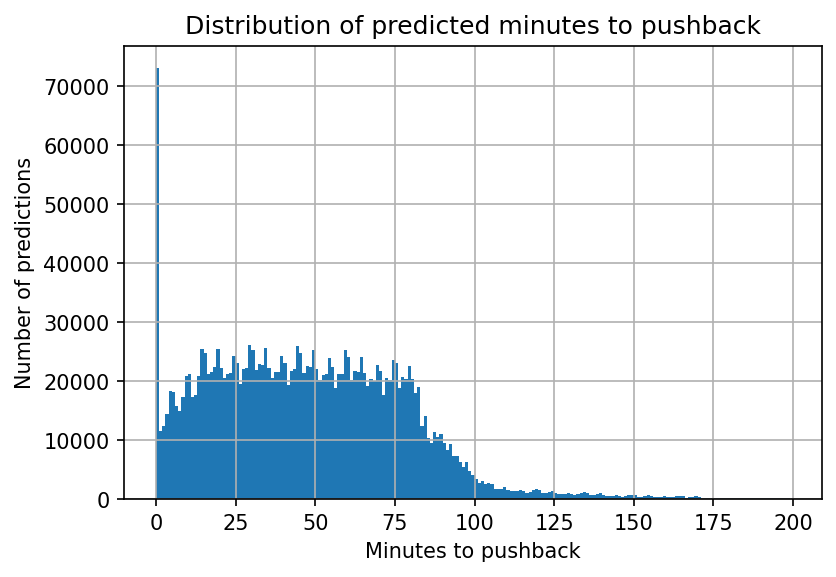

In [44]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
predictions.minutes_until_pushback.clip(lower=0, upper=200).hist(bins=np.arange(0, 200), ax=ax)
ax.set_title("Distribution of predicted minutes to pushback")
ax.set_ylabel("Number of predictions")
ax.set_xlabel("Minutes to pushback")
_ = plt.show()

In [45]:
assert (predictions.columns == submission_format.columns).all()
assert len(predictions) == len(submission_format)
assert predictions[["gufi", "timestamp", "airport"]].equals(
    submission_format[["gufi", "timestamp", "airport"]]
)

In [46]:
predictions.to_csv("validation_predictions_baseline.zip", index=False)